In [122]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collinearity import SelectNonCollinear
from sklearn.feature_selection import f_classif
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import xgboost as xgb


from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,classification_report,roc_curve,roc_auc_score
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

In [71]:
df=pd.read_csv(r"C:\Users\Vivek Raj\Downloads\UGproject\uci-secom.csv")

In [72]:
df.head()

,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,...,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Columns: 592 entries, Time to Pass/Fail
dtypes: float64(590), int64(1), object(1)
memory usage: 7.1+ MB


In [74]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,581,582,583,584,585,586,587,588,589,Pass/Fail
count,1561.000000,1560.000000,1553.000000,1553.000000,1553.000000,1553.0,1553.000000,1558.000000,1565.000000,1565.000000,...,618.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1567.000000
mean,3014.452896,2495.850231,2200.547318,1396.376627,4.197013,100.0,101.112908,0.121822,1.462862,-0.000841,...,97.934373,0.500096,0.015318,0.003847,3.067826,0.021458,0.016475,0.005283,99.670066,-0.867262
std,73.621787,80.407705,29.513152,441.691640,56.355540,0.0,6.237214,0.008961,0.073897,0.015116,...,87.520966,0.003404,0.017180,0.003720,3.578033,0.012358,0.008808,0.002867,93.891919,0.498010
min,2743.240000,2158.750000,2060.660000,0.000000,0.681500,100.0,82.131100,0.000000,1.191000,-0.053400,...,0.000000,0.477800,0.006000,0.001700,1.197500,-0.016900,0.003200,0.001000,0.000000,-1.000000
25%,2966.260000,2452.247500,2181.044400,1081.875800,1.017700,100.0,97.920000,0.121100,1.411200,-0.010800,...,46.184900,0.497900,0.011600,0.003100,2.306500,0.013425,0.010600,0.003300,44.368600,-1.000000
50%,3011.490000,2499.405000,2201.066700,1285.214400,1.316800,100.0,101.512200,0.122400,1.461600,-0.001300,...,72.288900,0.500200,0.013800,0.003600,2.757650,0.020500,0.014800,0.004600,71.900500,-1.000000
75%,3056.650000,2538.822500,2218.055500,1591.223500,1.525700,100.0,104.586700,0.123800,1.516900,0.008400,...,116.539150,0.502375,0.016500,0.004100,3.295175,0.027600,0.020300,0.006400,114.749700,-1.000000
max,3356.350000,2846.440000,2315.266700,3715.041700,1114.536600,100.0,129.252200,0.128600,1.656400,0.074900,...,737.304800,0.509800,0.476600,0.104500,99.303200,0.102800,0.079900,0.028600,737.304800,1.000000


In [75]:
# sorted(df.isnull().sum(),reverse=True)

c:\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Pass/Fail', ylabel='count'>

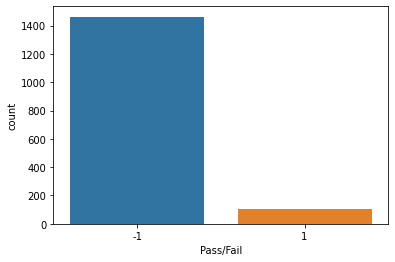

In [76]:
sns.countplot(df["Pass/Fail"])

In [77]:
df['Pass/Fail'].describe()

count    1567.000000
mean       -0.867262
std         0.498010
min        -1.000000
25%        -1.000000
50%        -1.000000
75%        -1.000000
max         1.000000
Name: Pass/Fail, dtype: float64

In [78]:
df.shape[0]

1567

In [79]:
limit=df.shape[0]*.90
df=df.dropna(thresh=limit,axis=1)

In [80]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,577,582,583,584,585,586,587,588,589,Pass/Fail
count,1561.000000,1560.000000,1553.000000,1553.000000,1553.000000,1553.0,1553.000000,1558.000000,1565.000000,1565.000000,...,1567.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1567.000000
mean,3014.452896,2495.850231,2200.547318,1396.376627,4.197013,100.0,101.112908,0.121822,1.462862,-0.000841,...,16.642363,0.500096,0.015318,0.003847,3.067826,0.021458,0.016475,0.005283,99.670066,-0.867262
std,73.621787,80.407705,29.513152,441.691640,56.355540,0.0,6.237214,0.008961,0.073897,0.015116,...,12.485267,0.003404,0.017180,0.003720,3.578033,0.012358,0.008808,0.002867,93.891919,0.498010
min,2743.240000,2158.750000,2060.660000,0.000000,0.681500,100.0,82.131100,0.000000,1.191000,-0.053400,...,4.582000,0.477800,0.006000,0.001700,1.197500,-0.016900,0.003200,0.001000,0.000000,-1.000000
25%,2966.260000,2452.247500,2181.044400,1081.875800,1.017700,100.0,97.920000,0.121100,1.411200,-0.010800,...,11.501550,0.497900,0.011600,0.003100,2.306500,0.013425,0.010600,0.003300,44.368600,-1.000000
50%,3011.490000,2499.405000,2201.066700,1285.214400,1.316800,100.0,101.512200,0.122400,1.461600,-0.001300,...,13.817900,0.500200,0.013800,0.003600,2.757650,0.020500,0.014800,0.004600,71.900500,-1.000000
75%,3056.650000,2538.822500,2218.055500,1591.223500,1.525700,100.0,104.586700,0.123800,1.516900,0.008400,...,17.080900,0.502375,0.016500,0.004100,3.295175,0.027600,0.020300,0.006400,114.749700,-1.000000
max,3356.350000,2846.440000,2315.266700,3715.041700,1114.536600,100.0,129.252200,0.128600,1.656400,0.074900,...,96.960100,0.509800,0.476600,0.104500,99.303200,0.102800,0.079900,0.028600,737.304800,1.000000


In [81]:
# sorted(df.isnull().sum(),reverse=True)

In [82]:
dic=dict(df.nunique(axis=0))

In [83]:
l=[]
for i,j in dic.items():
    if(j==1):
        l.append(i)

In [84]:
df=df.drop(columns=l)

In [85]:
df.shape

(1567, 424)

In [86]:
df.describe()

,0,1,2,3,4,6,7,8,9,10,...,577,582,583,584,585,586,587,588,589,Pass/Fail
count,1561.000000,1560.000000,1553.000000,1553.000000,1553.000000,1553.000000,1558.000000,1565.000000,1565.000000,1565.000000,...,1567.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1567.000000
mean,3014.452896,2495.850231,2200.547318,1396.376627,4.197013,101.112908,0.121822,1.462862,-0.000841,0.000146,...,16.642363,0.500096,0.015318,0.003847,3.067826,0.021458,0.016475,0.005283,99.670066,-0.867262
std,73.621787,80.407705,29.513152,441.691640,56.355540,6.237214,0.008961,0.073897,0.015116,0.009302,...,12.485267,0.003404,0.017180,0.003720,3.578033,0.012358,0.008808,0.002867,93.891919,0.498010
min,2743.240000,2158.750000,2060.660000,0.000000,0.681500,82.131100,0.000000,1.191000,-0.053400,-0.034900,...,4.582000,0.477800,0.006000,0.001700,1.197500,-0.016900,0.003200,0.001000,0.000000,-1.000000
25%,2966.260000,2452.247500,2181.044400,1081.875800,1.017700,97.920000,0.121100,1.411200,-0.010800,-0.005600,...,11.501550,0.497900,0.011600,0.003100,2.306500,0.013425,0.010600,0.003300,44.368600,-1.000000
50%,3011.490000,2499.405000,2201.066700,1285.214400,1.316800,101.512200,0.122400,1.461600,-0.001300,0.000400,...,13.817900,0.500200,0.013800,0.003600,2.757650,0.020500,0.014800,0.004600,71.900500,-1.000000
75%,3056.650000,2538.822500,2218.055500,1591.223500,1.525700,104.586700,0.123800,1.516900,0.008400,0.005900,...,17.080900,0.502375,0.016500,0.004100,3.295175,0.027600,0.020300,0.006400,114.749700,-1.000000
max,3356.350000,2846.440000,2315.266700,3715.041700,1114.536600,129.252200,0.128600,1.656400,0.074900,0.053000,...,96.960100,0.509800,0.476600,0.104500,99.303200,0.102800,0.079900,0.028600,737.304800,1.000000


In [87]:
n=dict(df.nunique(axis=0))
n

{'Time': 1534,
 '0': 1520,
 '1': 1504,
 '2': 507,
 '3': 518,
 '4': 503,
 '6': 510,
 '7': 89,
 '8': 1208,
 '9': 568,
 '10': 392,
 '11': 378,
 '12': 1547,
 '14': 1555,
 '15': 1561,
 '16': 1477,
 '17': 281,
 '18': 1548,
 '19': 361,
 '20': 552,
 '21': 1295,
 '22': 1176,
 '23': 1480,
 '24': 1494,
 '25': 704,
 '26': 624,
 '27': 1148,
 '28': 869,
 '29': 188,
 '30': 842,
 '31': 1275,
 '32': 338,
 '33': 330,
 '34': 329,
 '35': 331,
 '36': 330,
 '37': 325,
 '38': 329,
 '39': 333,
 '40': 291,
 '41': 315,
 '43': 1523,
 '44': 1376,
 '45': 1520,
 '46': 1562,
 '47': 1341,
 '48': 1486,
 '50': 1520,
 '51': 1562,
 '53': 153,
 '54': 169,
 '55': 107,
 '56': 187,
 '57': 159,
 '58': 382,
 '59': 1500,
 '60': 1498,
 '61': 1418,
 '62': 1518,
 '63': 1534,
 '64': 1496,
 '65': 1550,
 '66': 1559,
 '67': 1306,
 '68': 1479,
 '70': 1533,
 '71': 1557,
 '74': 2,
 '75': 675,
 '76': 891,
 '77': 842,
 '78': 995,
 '79': 691,
 '80': 922,
 '81': 580,
 '82': 888,
 '83': 1506,
 '84': 180,
 '86': 472,
 '87': 249,
 '88': 973,
 '

In [88]:
dic=dict(df.isnull().sum())

In [89]:
k=[]
for i,j in dic.items():
    if(j==51):
        k.append(i)

In [90]:
k

['89', '90', '224', '225', '362', '363', '496', '497']

In [91]:
# for i in range(len(k)):
#     sns.boxplot(df[k[i]])
#     plt.show()

In [92]:
np.where(df['89'].isnull())

(array([1362, 1371, 1380, 1390, 1391, 1392, 1401, 1419, 1420, 1432, 1439,
        1443, 1463, 1474, 1478, 1479, 1483, 1484, 1485, 1486, 1487, 1492,
        1495, 1498, 1499, 1500, 1501, 1502, 1504, 1505, 1507, 1508, 1510,
        1512, 1513, 1515, 1516, 1522, 1527, 1528, 1530, 1534, 1538, 1547,
        1551, 1552, 1554, 1555, 1556, 1560, 1565], dtype=int64),)

In [93]:
np.where(df['90'].isnull())

(array([1362, 1371, 1380, 1390, 1391, 1392, 1401, 1419, 1420, 1432, 1439,
        1443, 1463, 1474, 1478, 1479, 1483, 1484, 1485, 1486, 1487, 1492,
        1495, 1498, 1499, 1500, 1501, 1502, 1504, 1505, 1507, 1508, 1510,
        1512, 1513, 1515, 1516, 1522, 1527, 1528, 1530, 1534, 1538, 1547,
        1551, 1552, 1554, 1555, 1556, 1560, 1565], dtype=int64),)

In [94]:
np.where(df['224'].isnull())

(array([1362, 1371, 1380, 1390, 1391, 1392, 1401, 1419, 1420, 1432, 1439,
        1443, 1463, 1474, 1478, 1479, 1483, 1484, 1485, 1486, 1487, 1492,
        1495, 1498, 1499, 1500, 1501, 1502, 1504, 1505, 1507, 1508, 1510,
        1512, 1513, 1515, 1516, 1522, 1527, 1528, 1530, 1534, 1538, 1547,
        1551, 1552, 1554, 1555, 1556, 1560, 1565], dtype=int64),)

In [95]:
np.where(df['225'].isnull())

(array([1362, 1371, 1380, 1390, 1391, 1392, 1401, 1419, 1420, 1432, 1439,
        1443, 1463, 1474, 1478, 1479, 1483, 1484, 1485, 1486, 1487, 1492,
        1495, 1498, 1499, 1500, 1501, 1502, 1504, 1505, 1507, 1508, 1510,
        1512, 1513, 1515, 1516, 1522, 1527, 1528, 1530, 1534, 1538, 1547,
        1551, 1552, 1554, 1555, 1556, 1560, 1565], dtype=int64),)

In [96]:
ref=list(np.where(df['225'].isnull()))

In [97]:
df=df.drop(df.index[ref[0]])

In [98]:
df

,Time,0,1,2,3,4,6,7,8,9,...,577,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,97.6133,0.1242,1.5005,0.0162,...,14.9509,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,102.3433,0.1247,1.4966,-0.0005,...,10.9003,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,95.4878,0.1241,1.4436,0.0041,...,9.2721,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,104.2367,0.1217,1.4882,-0.0124,...,8.5831,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.3967,0.1235,1.5031,-0.0031,...,10.9698,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1561,2008-10-16 15:02:00,2951.14,2326.59,2212.6334,1081.5662,1.0096,113.4278,0.1253,1.4492,-0.0134,...,15.6350,0.4965,0.0118,0.0032,2.3817,0.0320,0.0148,0.0051,46.4573,-1
1562,2008-10-16 15:13:00,2899.41,2464.36,2179.7333,3085.3781,1.4843,82.2467,0.1248,1.3424,-0.0045,...,11.7256,0.4988,0.0143,0.0039,2.8669,0.0068,0.0138,0.0047,203.1720,-1
1563,2008-10-16 20:49:00,3052.31,2522.55,2198.5667,1124.6595,0.8763,98.4689,0.1205,1.4333,-0.0061,...,17.8379,0.4975,0.0131,0.0036,2.6238,0.0068,0.0138,0.0047,203.1720,-1
1564,2008-10-17 05:26:00,2978.81,2379.78,2206.3000,1110.4967,0.8236,99.4122,0.1208,NaN,NaN,...,17.7267,0.4987,0.0153,0.0041,3.0590,0.0197,0.0086,0.0025,43.5231,-1


In [99]:
columns=list(df.columns.values)

In [100]:
df = df.fillna(df.mean())

In [101]:
df.shape

(1516, 424)

In [102]:
df['Pass/Fail'].value_counts()

-1    1413
 1     103
Name: Pass/Fail, dtype: int64

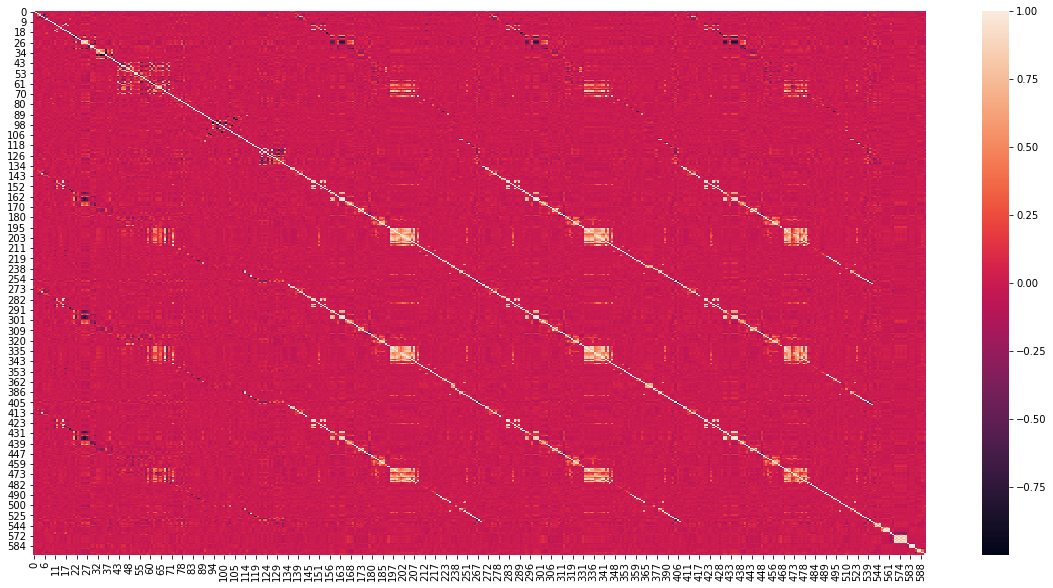

In [103]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr())
plt.show()

In [104]:
df['Time']=pd.to_datetime(df['Time'])

In [105]:
x=df.drop(columns=['Pass/Fail','Time'])
y=df['Pass/Fail']

In [106]:
x.corr()

,0,1,2,3,4,6,7,8,9,10,...,576,577,582,583,584,585,586,587,588,589
0,1.000000,-0.137306,0.001286,-0.008949,-0.011558,0.008491,0.033370,-0.067037,0.009701,0.002978,...,0.012170,0.009091,-0.000615,0.024132,0.020826,0.024254,0.016744,-0.019604,-0.021440,0.012868
1,-0.137306,1.000000,0.007011,-0.007041,-0.001733,-0.035584,-0.012828,0.030294,0.022924,0.010729,...,0.003477,-0.006754,0.046911,0.003294,-0.001097,0.002590,-0.008408,0.017910,0.010547,0.044756
2,0.001286,0.007011,1.000000,0.329946,0.095983,-0.148680,-0.144214,0.012272,0.014948,0.072000,...,-0.001839,-0.030270,-0.004539,0.015998,0.018625,0.016022,-0.029151,-0.029722,-0.031646,-0.029773
3,-0.008949,-0.007041,0.329946,1.000000,-0.061206,-0.668663,0.071851,-0.069589,0.067361,0.048474,...,0.016033,0.015535,0.009158,0.027645,0.026458,0.028273,0.048668,-0.032639,-0.025624,-0.083791
4,-0.011558,-0.001733,0.095983,-0.061206,1.000000,-0.079481,-0.348251,-0.028630,0.055149,-0.006973,...,-0.012500,-0.003938,0.045611,-0.001241,-0.001578,-0.001564,-0.045119,-0.031350,-0.026425,0.052954
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
585,0.024254,0.002590,0.016022,0.028273,-0.001564,-0.039613,0.010653,0.021601,-0.036163,0.040559,...,-0.015885,-0.022696,-0.201901,0.999895,0.995490,1.000000,0.002393,-0.004431,-0.004228,-0.003074
586,0.016744,-0.008408,-0.029151,0.048668,-0.045119,-0.054761,0.060430,-0.004117,0.034068,-0.005733,...,-0.012093,-0.002642,-0.015222,0.001904,0.000816,0.002393,1.000000,0.167933,0.164530,-0.485229
587,-0.019604,0.017910,-0.029722,-0.032639,-0.031350,0.030303,-0.019316,0.024846,0.046260,0.055489,...,0.002929,-0.005851,-0.028248,-0.004247,-0.003707,-0.004431,0.167933,1.000000,0.973604,0.386696
588,-0.021440,0.010547,-0.031646,-0.025624,-0.026425,0.027202,-0.018740,0.028783,0.045723,0.054658,...,-0.007476,-0.012481,-0.024935,-0.004068,-0.003322,-0.004228,0.164530,0.973604,1.000000,0.384813


In [107]:
x_column=x.columns

In [108]:
selector = SelectNonCollinear(correlation_threshold=0.4,scoring=f_classif)
x = x.values
y = y.values

In [109]:
y

array([-1, -1,  1, ..., -1, -1, -1], dtype=int64)

In [110]:
y = np.where(y==-1,0,1)
selector.fit(x,y)
mask = selector.get_support()

In [112]:
x_processed = pd.DataFrame(x[:,mask],columns = np.array(x_column)[mask])

<AxesSubplot:>

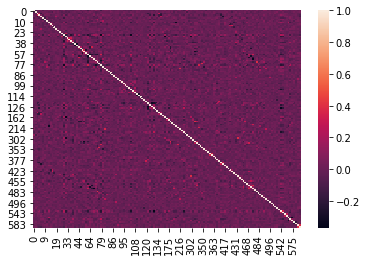

In [116]:
sns.heatmap(x_processed.corr())

In [123]:
x_train , x_test , y_train , y_test = train_test_split(x,y ,test_size = 0.2 ,random_state =0)
smote = SMOTE()

x_smote, y_smote = smote.fit_resample(x, y)

c:\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:ylabel='count'>

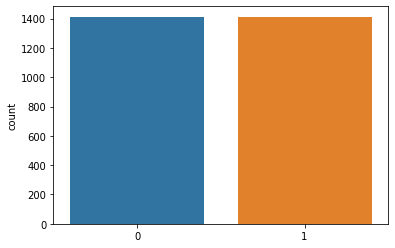

In [125]:
sns.countplot(y_smote)

In [126]:
model_lr=LogisticRegression()
model_lr.fit(x_smote,y_smote)
print("accuracy : ",accuracy_score(y_test,model_lr.predict(x_test)))
print(classification_report(y_true=y_test, y_pred=model_lr.predict(x_test)))

accuracy :  0.6907894736842105
              precision    recall  f1-score   support

           0       0.99      0.69      0.81       291
           1       0.10      0.77      0.18        13

    accuracy                           0.69       304
   macro avg       0.54      0.73      0.49       304
weighted avg       0.95      0.69      0.78       304



c:\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [127]:
y_pred = model_lr.predict(x_test)
confusion_matrix(y_smote,y_smote)
pd.crosstab(y_test, y_pred, rownames = ['Actual'], colnames =['Predicted'], margins = True)

Predicted,0,1,All
Actual,,,
0,200,91,291
1,3,10,13
All,203,101,304


In [128]:
model_knn=KNeighborsClassifier(n_neighbors=5)
model_knn.fit(x_smote,y_smote)
print("accuracy : ",accuracy_score(y_test,model_knn.predict(x_test)))
print(classification_report(y_true=y_test, y_pred=model_knn.predict(x_test)))

accuracy :  0.7664473684210527
              precision    recall  f1-score   support

           0       1.00      0.76      0.86       291
           1       0.15      1.00      0.27        13

    accuracy                           0.77       304
   macro avg       0.58      0.88      0.56       304
weighted avg       0.96      0.77      0.84       304



In [129]:
y_pred = model_knn.predict(x_test)
confusion_matrix(y_test,y_pred)
pd.crosstab(y_test, y_pred, rownames = ['Actual'], colnames =['Predicted'], margins = True)

Predicted,0,1,All
Actual,,,
0,220,71,291
1,0,13,13
All,220,84,304


In [130]:
model_tree=tree.DecisionTreeClassifier(max_depth=5)
model_tree.fit(x_smote,y_smote)
print("accuracy : ",accuracy_score(y_test,model_tree.predict(x_test)))
print(classification_report(y_true=y_test, y_pred=model_tree.predict(x_test)))

accuracy :  0.8289473684210527
              precision    recall  f1-score   support

           0       0.99      0.83      0.90       291
           1       0.18      0.85      0.30        13

    accuracy                           0.83       304
   macro avg       0.59      0.84      0.60       304
weighted avg       0.96      0.83      0.88       304



In [131]:
y_pred = model_tree.predict(x_test)
confusion_matrix(y_test,y_pred)
pd.crosstab(y_test, y_pred, rownames = ['Actual'], colnames =['Predicted'], margins = True)

Predicted,0,1,All
Actual,,,
0,241,50,291
1,2,11,13
All,243,61,304


In [132]:
model_rf = RandomForestClassifier(n_estimators=100,random_state=42)
model_rf.fit(x_smote, y_smote)
print("accuracy : ",accuracy_score(y_test,model_rf.predict(x_test)))
print(classification_report(y_true=y_test, y_pred=model_rf.predict(x_test)))

accuracy :  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       291
           1       1.00      1.00      1.00        13

    accuracy                           1.00       304
   macro avg       1.00      1.00      1.00       304
weighted avg       1.00      1.00      1.00       304



In [133]:
y_pred = model_rf.predict(x_test)
confusion_matrix(y_test,y_pred)
pd.crosstab(y_test, y_pred, rownames = ['Actual'], colnames =['Predicted'], margins = True)

Predicted,0,1,All
Actual,,,
0,291,0,291
1,0,13,13
All,291,13,304


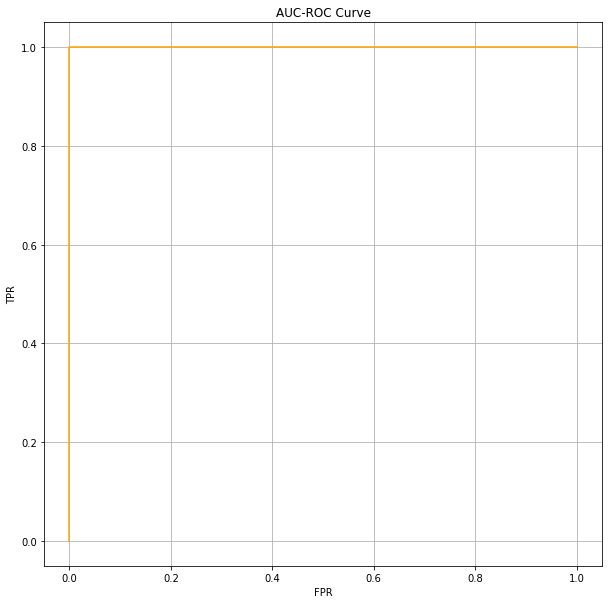

In [137]:
y_pred_proba = model_rf.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(10,10))
plt.plot(fpr,tpr,color='orange',)
plt.title("AUC-ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.grid()

In [135]:
model_xgb = xgb.XGBClassifier(n_estimators=500,learning_rate=0.001)
model_xgb.fit(x_smote,y_smote)
print("accuracy : ",accuracy_score(y_test,model_xgb.predict(x_test)))
print(classification_report(y_true=y_test, y_pred=model_xgb.predict(x_test)))

c:\python\python37\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:32:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
accuracy :  0.9144736842105263
              precision    recall  f1-score   support

           0       0.99      0.92      0.95       291
           1       0.31      0.85      0.46        13

    accuracy                           0.91       304
   macro avg       0.65      0.88      0.71       304
weighted avg       0.96      0.91      0.93       304



In [136]:
y_pred = model_xgb.predict(x_test)
confusion_matrix(y_test,y_pred)
pd.crosstab(y_test, y_pred, rownames = ['Actual'], colnames =['Predicted'], margins = True)

Predicted,0,1,All
Actual,,,
0,267,24,291
1,2,11,13
All,269,35,304


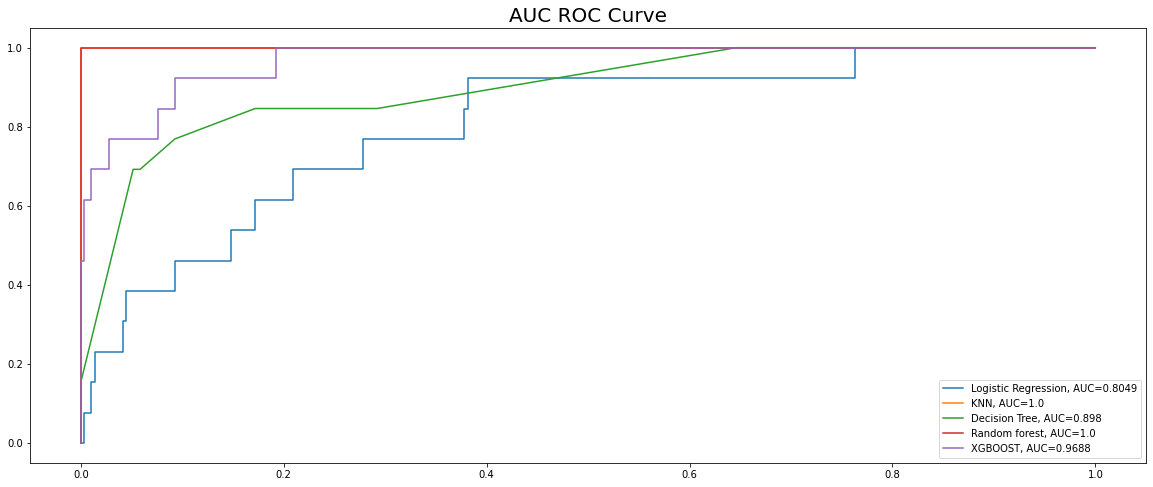

In [144]:
plt.figure(figsize=(20,8))

y_pred = model_lr.predict_proba(x_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred)
auc = round(roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="Logistic Regression, AUC="+str(auc))

y_pred = model_knn.predict_proba(x_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred)
auc = round(roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="KNN, AUC="+str(auc))

y_pred = model_tree.predict_proba(x_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred)
auc = round(roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="Decision Tree, AUC="+str(auc))

y_pred = model_rf.predict_proba(x_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred)
auc = round(roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="Random forest, AUC="+str(auc))

y_pred = model_xgb.predict_proba(x_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred)
auc = round(roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="XGBOOST, AUC="+str(auc))

plt.title("AUC ROC Curve",fontsize=20)
plt.legend()